In [1]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
okt = Okt()
kkma = Kkma()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter

import warnings
warnings.simplefilter("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 기초 불용어 처리
from nltk.corpus import stopwords

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

import json
import ast

In [15]:
df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\size_final.xlsx")

# option 추린 파일 : size_final
# size 없는 리스트 : no_size

In [16]:
df.head()

,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
1,1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1,XX-Large
2,2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
3,3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1,Large
4,4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium


In [17]:
df = df.drop("Unnamed: 0",axis =1)
df.head()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1,XX-Large
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1,Large
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium


In [93]:
df["Grade"].mean()

4.594460929772502

# Grade, Rate 비교

In [ ]:
# Grade 긍정 5점, 부정 4점 이하
# Rate 긍정 양수, 부정 음수

# 1) Grade 가 5점일 때 부정적인 Rate

# 2) Grade 부정, Rate 부정


In [18]:
df["Rate"].value_counts()

 0    453
 2    218
 4     93
 3     67
 1     56
-2     53
 6     21
 5     17
-1     15
 7      7
 8      5
-3      3
-4      3
Name: Rate, dtype: int64

In [11]:
df["Grade"].value_counts()

5    727
4    202
3     54
1     16
2     12
Name: Grade, dtype: int64

# 추세선으로 전체 비교하기

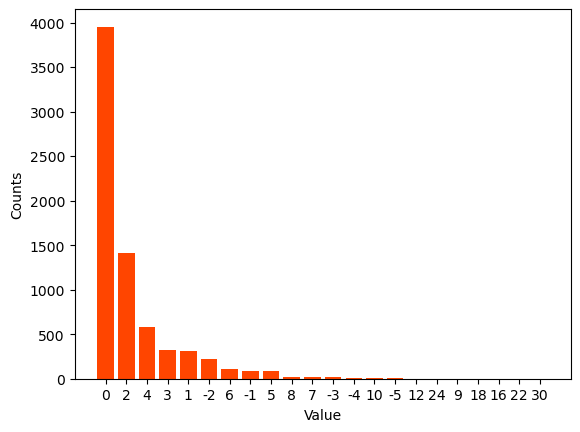

In [38]:

rate_check = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\Rate_polar check.xlsx")
value_counts = rate_check['Rate'].value_counts()
df_counts = value_counts.to_frame().reset_index()
df_counts.rename(columns={'index': 'value_index'}, inplace=True)

df_counts = df_counts.rename(columns = {"Rate":"Counts"})

# x축 문자열, y 축 숫자
plt.bar(df_counts["value_index"], df_counts["Counts"],color = 'orangered' )
plt.xlabel("Value")
plt.ylabel("Counts")

plt.show()

In [40]:
df_counts

,value_index,Counts
0,0,3953
1,2,1416
2,4,579
3,3,318
4,1,315
5,-2,220
6,6,112
7,-1,88
8,5,83
9,8,21


In [13]:
df_counts.head()

,value_index,Counts
0,0,3953
1,2,1416
2,4,579
3,3,318
4,1,315


In [24]:
df_counts_zero = df_counts.drop(0)

In [25]:
df_counts_zero

,value_index,Counts
1,2,1416
2,4,579
3,3,318
4,1,315
5,-2,220
6,6,112
7,-1,88
8,5,83
9,8,21
10,7,18


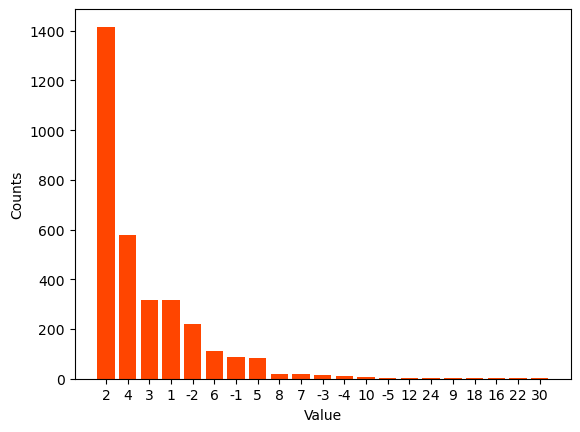

In [26]:
plt.bar(df_counts_zero["value_index"], df_counts_zero["Counts"],color = 'orangered' )
plt.xlabel("Value")
plt.ylabel("Counts")

plt.show()

In [47]:
size_value_counts = df["Rate"].value_counts()
size_value_counts

 0    453
 2    218
 4     93
 3     67
 1     56
-2     53
 6     21
 5     17
-1     15
 7      7
 8      5
-3      3
-4      3
Name: Rate, dtype: int64

In [56]:
size_df_counts = size_value_counts.to_frame().reset_index()

In [57]:
size_df_counts

,index,Rate
0,0,453
1,2,218
2,4,93
3,3,67
4,1,56
5,-2,53
6,6,21
7,5,17
8,-1,15
9,7,7


In [58]:
size_df_counts.rename(columns={'index': 'value_index'}, inplace=True)
size_df_counts["value_index"] = size_df_counts["value_index"].astype(str)

size_df_counts= size_df_counts.rename(columns = {"Rate":"Counts"})

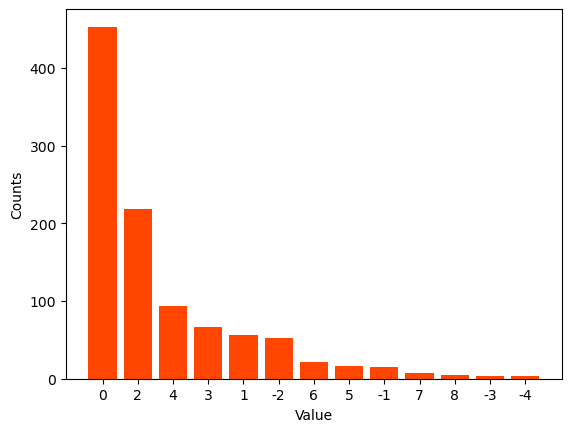

In [59]:
# x축 문자열, y 축 숫자
plt.bar(size_df_counts["value_index"], size_df_counts["Counts"],color = 'orangered' )
plt.xlabel("Value")
plt.ylabel("Counts")

plt.show()

In [69]:
size_df_counts_zero = df_counts.drop(0)

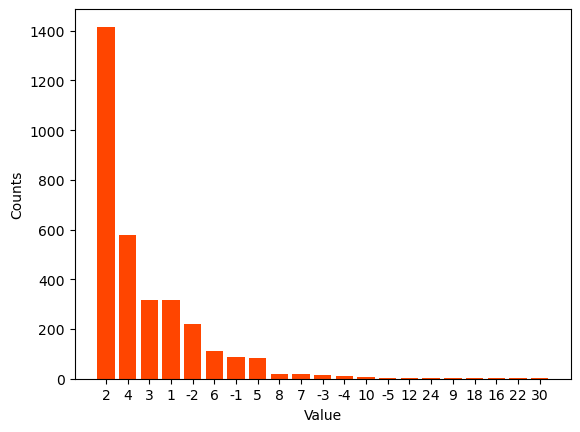

In [70]:
# x축 문자열, y 축 숫자
plt.bar(size_df_counts_zero["value_index"], size_df_counts_zero["Counts"],color = 'orangered' )
plt.xlabel("Value")
plt.ylabel("Counts")

plt.show()

In [60]:
df_counts

,value_index,Counts
0,0,3953
1,2,1416
2,4,579
3,3,318
4,1,315
5,-2,220
6,6,112
7,-1,88
8,5,83
9,8,21


In [62]:
print(type(df_counts))

<class 'pandas.core.frame.DataFrame'>


In [61]:
size_df_counts

,value_index,Counts
0,0,453
1,2,218
2,4,93
3,3,67
4,1,56
5,-2,53
6,6,21
7,5,17
8,-1,15
9,7,7


In [95]:
no_size = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\no_size.xlsx")


In [97]:
no_size_value_counts = no_size["Rate"].value_counts()
no_size_value_counts

 0     3491
 2     1192
 4      484
 1      251
 3      249
-2      167
 6       88
-1       73
 5       66
 8       15
 7       11
-3       11
-4        5
-5        3
 10       3
 12       2
 24       1
 9        1
 18       1
 16       1
 22       1
 30       1
Name: Rate, dtype: int64

In [99]:
no_size_value_counts = no_size_value_counts.to_frame().reset_index()
no_size_value_counts.rename(columns={'index': 'value_index'}, inplace=True)
no_size_value_counts["value_index"] = no_size_value_counts["value_index"].astype(str)

no_size_value_counts= no_size_value_counts.rename(columns = {"Rate":"Counts"})

In [101]:
no_size_value_counts

,value_index,Counts
0,0,3491
1,2,1192
2,4,484
3,1,251
4,3,249
5,-2,167
6,6,88
7,-1,73
8,5,66
9,8,15


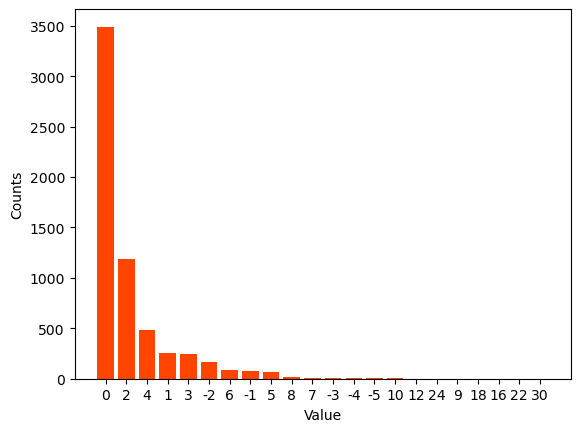

In [100]:
# x축 문자열, y 축 숫자
plt.bar(no_size_value_counts["value_index"], no_size_value_counts["Counts"],color = 'orangered' )
plt.xlabel("Value")
plt.ylabel("Counts")

plt.show()

In [ ]:
# 합치기,,,

In [106]:
df_counts
size_df_counts
no_size_value_counts

,value_index,Counts
0,0,3491
1,2,1192
2,4,484
3,1,251
4,3,249
5,-2,167
6,6,88
7,-1,73
8,5,66
9,8,15


In [107]:
df_counts.set_index("value_index")


,Counts
value_index,
0,3953
2,1416
4,579
3,318
1,315
-2,220
6,112
-1,88
5,83


In [108]:
size_df_counts.set_index("value_index")

,Counts
value_index,
0,453
2,218
4,93
3,67
1,56
-2,53
6,21
5,17
-1,15


In [109]:
no_size_value_counts.set_index("value_index")

,Counts
value_index,
0,3491
2,1192
4,484
1,251
3,249
-2,167
6,88
-1,73
5,66


In [114]:
size_df_counts.index = size_df_counts["value_index"].astype(str)

In [115]:
no_size_value_counts.index = no_size_value_counts["value_index"].astype(str)

In [116]:
merged_size = pd.merge(size_df_counts.set_index('value_index'), no_size_value_counts.set_index('value_index'), 
                         left_index=True, right_index=True, how='outer')

In [117]:
merged_size

,Counts_x,Counts_y
value_index,,
-1,15.0,73
-2,53.0,167
-3,3.0,11
-4,3.0,5
-5,NaN,3
0,453.0,3491
1,56.0,251
10,NaN,3
12,NaN,2


In [121]:
merged_size.index

Index(['-1', '-2', '-3', '-4', '-5', '0', '1', '10', '12', '16', '18', '2',
       '22', '24', '3', '30', '4', '5', '6', '7', '8', '9'],
      dtype='object', name='value_index')

In [122]:
merged_size["INDEX"] = ['-1', '-2', '-3', '-4', '-5', '0', '1', '10', '12', '16', '18', '2',
       '22', '24', '3', '30', '4', '5', '6', '7', '8', '9']





In [123]:
merged_size

,Counts_x,Counts_y,INDEX
value_index,,,
-1,15.0,73,-1
-2,53.0,167,-2
-3,3.0,11,-3
-4,3.0,5,-4
-5,NaN,3,-5
0,453.0,3491,0
1,56.0,251,1
10,NaN,3,10
12,NaN,2,12


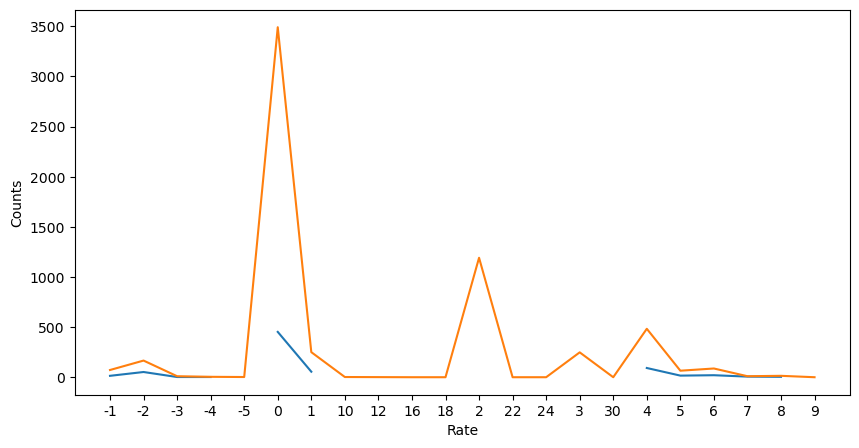

In [127]:
fig, ax = plt.subplots(figsize=(10, 5))

# 선 그래프 그리기
ax.plot(merged_size["INDEX"] , merged_size['Counts_x'], label='Counts_x')
ax.plot(merged_size['INDEX'], merged_size['Counts_y'], label='Counts_y')

# 축 라벨 설정
ax.set_xlabel("Rate")
ax.set_ylabel('Counts')

# 범례 설정
# ax.legend()

# 그래프 출력
plt.show()

In [131]:
merged_size.columns

Index(['Counts_x', 'Counts_y', 'INDEX'], dtype='object')

In [135]:
merged_size

,Counts_x,Counts_y,INDEX
value_index,,,
-1,15.0,73,-1
-2,53.0,167,-2
-3,3.0,11,-3
-4,3.0,5,-4
-5,NaN,3,-5
0,453.0,3491,0
1,56.0,251,1
10,NaN,3,10
12,NaN,2,12


In [141]:
merged_size

,value_index,Counts_x,Counts_y,INDEX
0,-1,15.0,73,-1
1,-2,53.0,167,-2
2,-3,3.0,11,-3
3,-4,3.0,5,-4
4,-5,NaN,3,-5
5,0,453.0,3491,0
6,1,56.0,251,1
7,10,NaN,3,10
8,12,NaN,2,12
9,16,NaN,1,16


In [142]:
merged_size = pd.merge(merged_size.set_index('value_index'), df_counts.set_index('value_index'),
                      left_index=True, right_index=True, how='outer')



In [143]:
merged_size

,Counts_x,Counts_y,INDEX,Counts
value_index,,,,
-1,15.0,73,-1,88
-2,53.0,167,-2,220
-3,3.0,11,-3,14
-4,3.0,5,-4,12
-5,NaN,3,-5,3
0,453.0,3491,0,3953
1,56.0,251,1,315
10,NaN,3,10,7
12,NaN,2,12,2


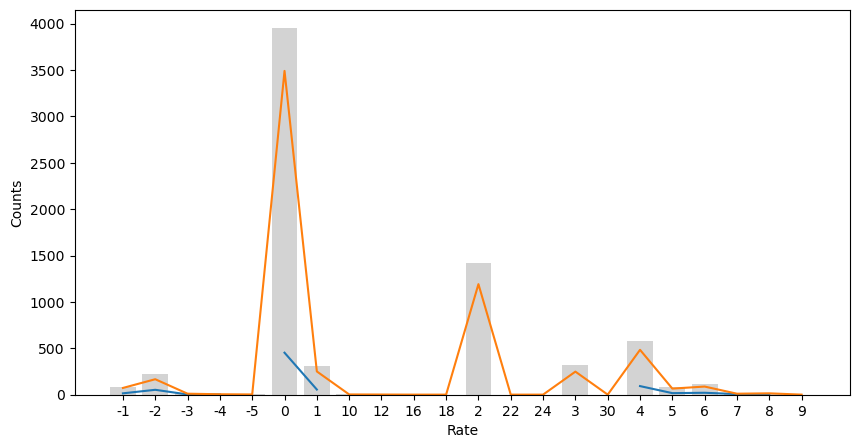

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))

# 선 그래프 그리기
ax.plot(merged_size["INDEX"] , merged_size['Counts_x'], label='Counts_x')
ax.plot(merged_size['INDEX'], merged_size['Counts_y'], label='Counts_y')
ax.bar(merged_size['INDEX'], merged_size['Counts'], color='lightgray')

# 축 라벨 설정
ax.set_xlabel("Rate")
ax.set_ylabel('Counts')

# 범례 설정
# ax.legend()

# 그래프 출력
plt.show()

# Grade 비교

In [64]:
# ProductNum groupby
full_df = vk
pd.crosstab(full_df["ProductNum"],full_df["Grade"])


Grade,1,2,3,4,5
ProductNum,,,,,
3524075075,0,1,0,0,0
3525034597,1,2,4,19,88
3525341131,0,0,6,11,58
3527733944,0,0,2,4,26
3527788674,0,0,0,0,1
...,...,...,...,...,...
5722177579,0,0,0,1,2
5723895525,0,0,0,1,0
5748299160,1,0,0,4,23


In [65]:
pd.crosstab(full_df["ProductNum"],full_df["Rate"])

Rate,-5,-4,-3,-2,-1,0,1,2,3,4,...,7,8,9,10,12,16,18,22,24,30
ProductNum,,,,,,,,,,,,,,,,,,,,,
3524075075,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3525034597,0,0,0,3,2,61,4,24,9,8,...,0,0,0,0,0,0,0,0,0,1
3525341131,0,0,0,2,0,47,5,16,1,1,...,0,1,0,0,0,0,0,1,0,0
3527733944,0,0,0,1,0,20,2,5,0,3,...,0,0,0,0,0,0,0,0,0,0
3527788674,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722177579,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5723895525,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5748299160,0,0,0,0,0,16,0,7,1,3,...,0,0,0,0,0,0,0,0,0,0


In [88]:
no_product= full_df.drop("ProductNum",axis =1)
no_product.head()


,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [89]:
no_proudct = no_product.drop("count",axis = 1)

In [90]:
no_product.describe()

,Grade,Rate,FilteredLen,count
count,7167.000000,7167.000000,7167.000000,7167.0
mean,4.563555,1.029440,6.321334,1.0
std,0.813883,1.822916,7.514420,0.0
min,1.000000,-5.000000,0.000000,1.0
25%,4.000000,0.000000,0.000000,1.0
50%,5.000000,0.000000,4.000000,1.0
75%,5.000000,2.000000,9.000000,1.0
max,5.000000,30.000000,115.000000,1.0


In [71]:
full_df.groupby(by="ProductNum") 

In [72]:
full_df.groupby(by="ProductNum").groups.keys()

dict_keys([3524075075, 3525034597, 3525341131, 3527733944, 3527788674, 3530749861, 3533502881, 3536870573, 3537850507, 3538198172, 3538862333, 3539198869, 3543704068, 3551091041, 3553208453, 3554467724, 3556338225, 3560475809, 3561865212, 3563012285, 3565287687, 3569992365, 3570023651, 3570489795, 3571532300, 3573909020, 3578542209, 3583126078, 3585177700, 3587534164, 3596863528, 3597198284, 3599750428, 3599964516, 3600147612, 3600941085, 3613677301, 3613977935, 3614031899, 3615370648, 3617180095, 3626312502, 3627279070, 3632624449, 3635719277, 3642607738, 3644199683, 3672055039, 3692081053, 3699486707, 3700868465, 3702574562, 3708667072, 3709396788, 3709882428, 3716602367, 3725094166, 3737852662, 3748242803, 3748474905, 3762343544, 3771573417, 3787846141, 3807832676, 3814825378, 3821008073, 3821424859, 3829065483, 3837266404, 3839073480, 3853720862, 3863810614, 3874630155, 3885402789, 3893205259, 3921389027, 3928621818, 3943391335, 3943409182, 3943410999, 3945152744, 3965650717, 39681

In [74]:
full_df.groupby(by="ProductNum").mean()

,Grade,Rate,FilteredLen,count
ProductNum,,,,
3524075075,2.000000,-2.000000,10.000000,1.0
3525034597,4.675439,1.271930,6.561404,1.0
3525341131,4.693333,1.013333,6.453333,1.0
3527733944,4.750000,0.875000,5.437500,1.0
3527788674,5.000000,0.000000,0.000000,1.0
...,...,...,...,...
5722177579,4.666667,1.333333,4.333333,1.0
5723895525,4.000000,0.000000,8.000000,1.0
5748299160,4.714286,1.250000,3.857143,1.0


In [92]:
full_df.groupby(by="Rate").head()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1
...,...,...,...,...,...,...,...,...,...,...,...
5653,5501664720,청년공학의꿈,2023.04.29,5,"사이즈 한국에서 110~115 입는데, 이것은 XL가 잘 맞습니다조금 여유 있게 입...",0,비공개,"['사이즈', '한국', '입는데', '맞습니다', '여유', '있게', '입고',...",10,43,1
5925,3556338225,이태원김혜수,2021.09.24,1,"THC3603 아마존 2% 추가적립 추천 코드입니다. 어디서 이따위를,, 비닐은 먼...",0,0,"['아마존', '추가', '적립', '추천', '코드', '입니다', '어디서', ...",-5,28,1
6264,3525034597,딩딩동동동,2023.04.15,5,좋아요좋아요좋아요 좋아요좋아요좋아요 좋아요좋아요좋아요 좋아요좋아요좋아요 좋아요좋아요좋아요,0,0,"['좋아요', '좋아요', '좋아요', '좋아요', '좋아요', '좋아요', '좋아...",30,15,1
6330,5549822380,sy7k***,2022.05.23,4,좋아요 좋아요 좋아요 좋아요 좋아요,0,0,"['좋아요', '좋아요', '좋아요', '좋아요', '좋아요']",10,5,1
